In [3]:
import numpy as np
from math import exp, sqrt
import networkx as nx
from scipy.integrate import solve_ivp
from Diff import *

In [2]:

sizes = [6, 5, 4]
probs = [[1, 0.05, 0.05], [0.05, 1, 0.05], [0.05, 0.05, 1]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
pos = nx.spring_layout(G)
A = nx.adjacency_matrix(G).todense()
L = nx.laplacian_matrix(G).toarray()


n = G.number_of_nodes()
x0 = np.zeros(n)
activ = np.random.choice(n, int(0.2*n))
x0[activ] = 100

/var/folders/4g/4249y1xd42d75jmm55xxl99m0000gn/T/ipykernel_43106/3879556483.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [5]:
c_bar = np.array([[20,3,5],
              [3,15,2],
              [5,2,10]])
C = construct_C(c_bar, sizes, n)
D = construct_D(A, C, n)
M = C*A - D
tau=0.1
T=10

In [32]:
A

matrix([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

In [6]:
lmb, v = np.linalg.eig(M)
data = np.array(x0)

In [29]:
a_0 = (np.linalg.inv(v)@x0)[0,:]


matrix([[-3.62484813e-01,  1.60221981e-01, -7.27436281e-02,
          3.24131385e-01, -8.37131760e-01, -2.88096478e-02,
          1.95535858e-02, -3.23010866e-02,  4.30057883e-18,
          1.26414146e-17, -8.84037416e-18,  3.75053631e-16,
         -4.80963553e-16, -1.03462751e-15,  2.00093128e-15],
        [-3.65080727e-01,  1.62936632e-01, -7.49791876e-02,
          1.19546574e-01,  2.51987502e-01, -3.10396502e-02,
          2.20313151e-02, -3.65822623e-02, -5.60895087e-17,
         -1.62440690e-16,  5.09424228e-16, -4.33550065e-16,
          8.63698820e-01, -2.19191889e-01,  3.63795590e-03],
        [-3.65080727e-01,  1.62936632e-01, -7.49791876e-02,
          1.19546574e-01,  2.51987502e-01, -3.10396502e-02,
          2.20313151e-02, -3.65822623e-02, -6.94261414e-17,
         -1.91432948e-17, -4.17294734e-16,  3.72240211e-16,
         -2.30937567e-01, -3.30555789e-01,  7.88754316e-01],
        [-3.65080727e-01,  1.62936632e-01, -7.49791876e-02,
          1.19546574e-01,  2.51987502

In [ ]:

time = [i*tau for i in range(1, int(T/tau))]

for t in time:
    E = np.array([exp(i*t) for i in lmb]) # vector of eigenvalues exponentials
    a = np.diag(E)@a_0  # vector of 'a' coefficients
    x = np.sum(np.diag(a)@v.T, axis=0) # psi(t)
    data = np.column_stack((data, x))

In [17]:

def hyperbolic_cross(orders, n):
	
	dimensions = len(orders)

	I = np.arange(n+1)
	I = np.reshape(I, (1,-1))

	for k in range(2, dimensions+1):
		J = np.array([]).reshape((I.shape[0]+1, 0))
		for i in range(n+1):
			l = I.shape[1]
			for j in range(l):
				z = I[:,j]
				#z = np.reshape(z, (I.shape[0], 1))

				if (i+1)**orders[k-1]*np.prod(np.power(z, np.array(orders[:k-1]))+1) <= n+1:

					z = np.row_stack((z.reshape((-1,1)), np.array([i]).reshape(1,1)))					
					J = np.hstack((J, z))
		 
		I = J

	return I#[:,dimensions-1:].astype(int)




In [21]:
I = hyperbolic_cross([1,1,1], 8)

(-0.5, 10.0)

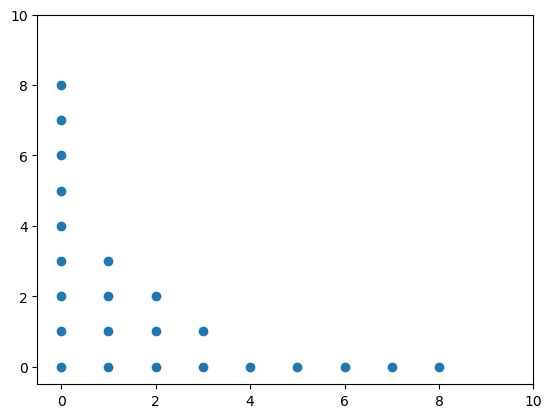

In [13]:
import matplotlib.pyplot as plt
plt.scatter(I[0,:],I[1,:])
plt.xlim(-0.5,10)
plt.ylim(-0.5,10)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, log
from scipy.linalg import expm
import itertools
from Diff import *
from IPython.display import clear_output
import time
import sys
sys.path.append('content/equadratures')

import equadratures as eq

In [35]:
basis = 'total-order'
my_basis = eq.Basis(basis)

In [38]:
my_basis.set_orders([4,3,3])

In [40]:
my_basis.elements

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 2.],
       [0., 1., 1.],
       [0., 2., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [2., 0., 0.],
       [0., 0., 3.],
       [0., 1., 2.],
       [0., 2., 1.],
       [0., 3., 0.],
       [1., 0., 2.],
       [1., 1., 1.],
       [1., 2., 0.],
       [2., 0., 1.],
       [2., 1., 0.],
       [3., 0., 0.],
       [0., 0., 4.],
       [0., 1., 3.],
       [0., 2., 2.],
       [0., 3., 1.],
       [0., 4., 0.],
       [1., 0., 3.],
       [1., 1., 2.],
       [1., 2., 1.],
       [1., 3., 0.],
       [2., 0., 2.],
       [2., 1., 1.],
       [2., 2., 0.],
       [3., 0., 1.],
       [3., 1., 0.],
       [4., 0., 0.]])

In [32]:
I.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [8., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [0., 4., 0.],
       [0., 5., 0.],
       [0., 6., 0.],
       [0., 7., 0.],
       [0., 8., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [3., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.],
       [0., 2., 1.],
       [0., 3., 1.],
       [0., 0., 2.],
       [1., 0., 2.],
       [2., 0., 2.],
       [0., 1., 2.],
       [0., 2., 2.],
       [0., 0., 3.],
       [1., 0., 3.],
       [0., 1., 3.],
       [0., 0., 4.],
       [0., 0., 5.],
       [0., 0., 6.],
       [0., 0., 7.],
       [0., 0., 8.]])

In [19]:
import numpy as np 
A = np.arange(9).reshape((3,3))
P = np.array([[0,1,0],[1,0,0],[0,0,1]])
I = np.eye(3)

In [31]:
P.T @ A @ P

array([[4, 3, 5],
       [1, 0, 2],
       [7, 6, 8]])

In [29]:
L=[1,0,2]
B = np.array([A[m,n] for m in L for n in L]).reshape((3,3))

In [30]:
B

array([[4, 3, 5],
       [1, 0, 2],
       [7, 6, 8]])